# Benchmarking Plot Creation

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

MARINA_BENCHMARK_PKL = '/data/nas-gpu/wang/atong/Datasets/Benchmark/MARINA_benchmark_results.pkl'
SPECTRE_BENCHMARK_PKL = '/data/nas-gpu/wang/atong/Datasets/Benchmark/SPECTRE_benchmark_results.pkl'

def load_benchmark_results(project_name):
    if project_name == 'MARINA':
        return pickle.load(open(MARINA_BENCHMARK_PKL, 'rb'))
    elif project_name == 'SPECTRE':
        return pickle.load(open(SPECTRE_BENCHMARK_PKL, 'rb'))
    else:
        raise ValueError(f"Project name {project_name} not supported")

marina_data = load_benchmark_results('MARINA')
spectre_data = load_benchmark_results('SPECTRE')

## Show histogram of cosine similarities

<Figure size 800x900 with 0 Axes>

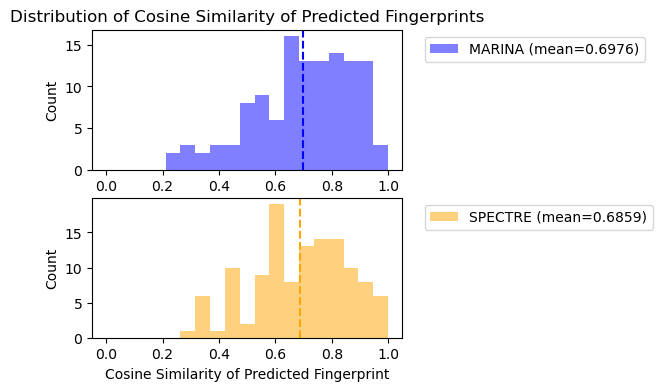

In [2]:
marina_cos_sims = [entry['predictions']['cosine_sim'].item() for entry in marina_data.values()]
spectre_cos_sims = [entry['predictions']['cosine_sim'].item() for entry in spectre_data.values()]
plt.figure(figsize=(8,9))
fig, ax = plt.subplots(2, 1, figsize=(4, 4))
marina_mean_val = np.mean(np.array(marina_cos_sims))
spectre_mean_val = np.mean(np.array(spectre_cos_sims))
ax[0].hist(marina_cos_sims, bins=np.linspace(0,1,20), alpha=0.5, label=f'MARINA (mean={marina_mean_val:.4f})', color='blue')
ax[1].hist(spectre_cos_sims, bins=np.linspace(0,1,20), alpha=0.5, label=f'SPECTRE (mean={spectre_mean_val:.4f})', color='orange')
ax[0].axvline(marina_mean_val, linestyle='--', color='blue')
ax[1].axvline(spectre_mean_val, linestyle='--', color='orange')
ax[1].set_xlabel(f'Cosine Similarity of Predicted Fingerprint')
ax[0].set_ylabel('Count')
ax[1].set_ylabel('Count')
ax[0].set_title(f'Distribution of Cosine Similarity of Predicted Fingerprints')
ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plot top-K hits for molecules in the retrieval set

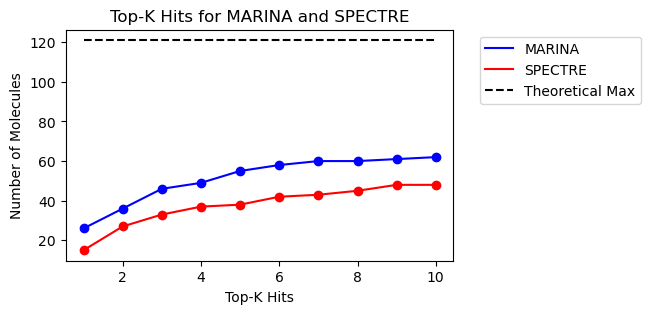

In [3]:
marina_topk_hits = [
    sum([
        entry['predictions']['dereplication_topk'][k] 
        for entry in marina_data.values()
        if entry['predictions']['dereplication_topk'][k] is not None
    ]) for k in range(1, 11)
]
spectre_topk_hits = [
    sum([
        entry['predictions']['dereplication_topk'][k]
        for entry in spectre_data.values()
        if entry['predictions']['dereplication_topk'][k] is not None
    ]) for k in range(1, 11)
]
theoretical_max = len([entry for entry in marina_data.values() if entry['predictions']['dereplication_topk'][1] is not None])

plt.figure(figsize=(5, 3))
plt.plot(range(1, 11), marina_topk_hits, color='blue', label='MARINA')
plt.plot(range(1, 11), spectre_topk_hits, color='red', label='SPECTRE')
plt.hlines(y=theoretical_max, xmin=1, xmax=10, color='black', linestyle='--', label='Theoretical Max')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.scatter(range(1, 11), marina_topk_hits, color='blue', label='MARINA')
plt.scatter(range(1, 11), spectre_topk_hits, color='red', label='SPECTRE')
plt.xlabel('Top-K Hits')
plt.ylabel('Number of Molecules')
plt.title(f'Top-K Hits for MARINA and SPECTRE')
plt.show()